In [1]:
from matplotlib.ticker import FormatStrFormatter as fsf
import matplotlib.pyplot as plt
from plots.mpltoolkit import mpl_loc, named_colors, markers, fancy_legend, negative_log, load_style_sheet
# from plots.mpltoolkit import mpl_loc, named_colors, markers, fancy_legend, load_style_sheet
import numpy as np
import math as m
import vice
import sys
import os
sys.path.append("..")
from src.utils import mu, get_velocity_profile, boxcarsmoothtrend
load_style_sheet("papers")
print(sys.version_info)

/Users/astrobeard/Work/Research/VICErepos/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


sys.version_info(major=3, minor=10, micro=2, releaselevel='final', serial=0)


In [2]:
output = vice.output("../outputs/constant/vgas-1")

/var/folders/26/nqb98q9x5_q6brmqy4v21dqm0000gp/T/ipykernel_98626/1641790235.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


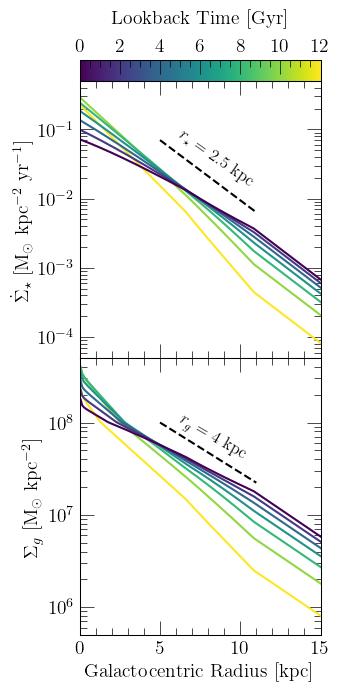

In [42]:
LOOKBACKS = [12, 10, 8, 6, 4, 2, 0]
COLORMAP = "viridis"

fig = plt.figure(figsize = (3.5, 7))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212, sharex = ax1)
for ax in [ax1, ax2]: ax.set_yscale("log")
ax1.set_xlim([0, 15])
ax2.set_xlabel(r"Galactocentric Radius [kpc]")
plt.setp(ax1.get_xticklabels(), visible = False)
ax1.set_ylabel(r"$\dot \Sigma_\star$ [M$_\odot$ kpc$^{-2}$ yr$^{-1}$]")
ax2.set_ylabel(r"$\Sigma_g$ [M$_\odot$ kpc$^{-2}$]")
ax1.set_ylim([5.e-5, 0.5])
ax2.set_ylim([5.e5, 5.e8])

norm = plt.Normalize(vmin = min(LOOKBACKS), vmax = max(LOOKBACKS))
cmap = plt.cm.ScalarMappable(cmap = COLORMAP, norm = norm)
cbar_ax = fig.add_axes([0.2, 0.8, 0.6, 0.05])
cbar = plt.colorbar(cmap, cax = cbar_ax, orientation = "horizontal", location = "top")
cbar.set_label("Lookback Time [Gyr]", labelpad = 10)
cbar.set_ticks(LOOKBACKS)

def plot_snapshot(ax_sfh, ax_gas, output, lookback, zone_width = 0.1, **kwargs):
    radii = [zone_width * (i + 0.5) for i in range(len(output.zones.keys()))]
    diff = [abs(_ - lookback) for _ in output.zones["zone0"].history["lookback"]]
    idx = diff.index(min(diff))
    sigma_sfr = []
    sigma_gas = []
    for i in range(len(radii)):
        area = np.pi * ((radii[i] + zone_width / 2)**2 - (radii[i] - zone_width / 2)**2)
        zone = output.zones["zone%d" % (i)]
        sigma_sfr.append(zone.history["sfr"][idx] / area)
        sigma_gas.append(zone.history["mgas"][idx] / area)
    ax_sfh.plot(radii, sigma_sfr, **kwargs)
    ax_gas.plot(radii, sigma_gas, **kwargs)

for i in range(len(LOOKBACKS)):
    kwargs = {"c": cmap.to_rgba(LOOKBACKS[i])}
    plot_snapshot(ax1, ax2, output, LOOKBACKS[i], **kwargs)

kwargs = {
    "c": named_colors()["black"],
    "linestyle": "--"
}
xvals = np.linspace(5, 11, 100)
yvals = [0.07 * np.exp(-(x - 5) / 2.5) for x in xvals]
ax1.plot(xvals, yvals, **kwargs)
yvals = [1.e8 * np.exp(-(x - 5) / 4) for x in xvals]
ax2.plot(xvals, yvals, **kwargs)
ax1.text(6, 0.015, r"$r_\star = 2.5$ kpc", fontsize = 12, rotation = -35)
ax2.text(6, 4e7, r"$r_g = 4$ kpc", fontsize = 12, rotation = -30)

plt.tight_layout()
plt.subplots_adjust(hspace = 0, top = 0.88)
cbar_ax.set_position([
    ax1.get_position().x0,
    ax1.get_position().y1,
    ax1.get_position().x1 - ax1.get_position().x0,
    0.03
])
for ext in ["pdf", "jpeg"]:
    kwargs = {}
    if ext == "jpeg": kwargs["dpi"] = 200
    plt.savefig("./evol/sfh-gas.%s" % (ext), **kwargs)
plt.show()

In [2]:
outputs = [
#     "../outputs/constant/vgas-0",
#     "../outputs/linear/dvdr-0p02",
    "../outputs/potential_well_deepening/gamma0p2",
#     "../outputs/linear/dvdr-0p05",
    "../outputs/amd/betaphiin0p7",
    "../outputs/amd/betaphiin0p5"
#     "../outputs/amd/betaphiin0p3"
#     "../outputs/river/insideout"
]
outputs = [vice.output(name) for name in outputs]

[0.0018124444416276696, 0.0021422892821169525, 0.0024610990074561195, 0.0027689015945814937, 0.003065822230962953, 0.0033520367179511643, 0.003950349676536127, 0.0045194937963073945, 0.00505689262109483, 0.005563087883438337, 0.006038958258248049, 0.0064854647627273386, 0.006903506300440875, 0.007251811012243399, 0.0077977014704288415, 0.008292169713628632, 0.008737541981935448, 0.009136089180932283, 0.00949002371539931, 0.009801500519259463, 0.010072615611117506, 0.010305404288268346, 0.010501927135820942, 0.010706358783031823, 0.010654211820630291, 0.010597258241536789, 0.010535862908144896, 0.010470370032182956, 0.010401107923015272, 0.01032838531400176, 0.010252494757799437, 0.010173713702687305, 0.010092303534616256, 0.010008511061431987, 0.00992256901671043, 0.009834697868739316, 0.009745104072168293, 0.009653983329095195, 0.009561518800945435, 0.00946788393696871, 0.009373240953365102, 0.009277742050914816, 0.009181530484901987, 0.009084740154963376, 0.008987497439365569, 0.0088

/var/folders/1p/lm_h7y810f9_7ygnvr2tjc_w0000gn/T/ipykernel_88716/2772351312.py:96: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


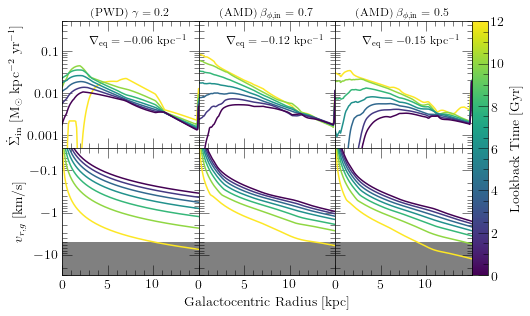

In [4]:
LOOKBACKS = range(0, 13, 2)[::-1]
COLORMAP = "viridis"
TITLES = [
#     r"$\frac{\partial v_{r,g}}{\partial R} = -0.02$ Gyr$^{-1}$",
#     r"$\frac{\partial v_{r,g}}{\partial R} = -0.05$ Gyr$^{-1}$",
#     r"$\partial v_{r,g} / \partial R = -0.02$ Gyr$^{-1}$",
    r"(PWD) $\gamma = 0.2$",
    r"(AMD) $\beta_{\phi,\text{in}} = 0.7$",
    r"(AMD) $\beta_{\phi,\text{in}} = 0.5$"
]
GRADSLOPES = [-0.06, -0.12, -0.15]
KPCPERGYR_TO_KMS = 1.022

fig = plt.figure(figsize = (7.5, 4.5))
top = []
bottom = []
for i in range(3):
    kwargs = {}
    if i:
        kwargs["sharex"] = top[0]
        kwargs["sharey"] = top[0]
    else: pass
    top.append(fig.add_subplot(231 + i, **kwargs))
    plt.setp(top[i].get_xticklabels(), visible = False)
#     top[i].text(2, 0.2, TITLES[i], fontsize = 12)
    top[i].text(3, 0.15, r"$\nabla_\text{eq} = %g$ kpc$^{-1}$" % (GRADSLOPES[i]), fontsize = 12)
    top[i].set_title(TITLES[i], fontsize = 12)
    kwargs["sharex"] = top[0]
    if i:
        kwargs["sharey"] = bottom[0]
    else:
        kwargs["sharey"] = None
    bottom.append(fig.add_subplot(234 + i, **kwargs))
    if i:
        plt.setp(top[i].get_yticklabels(), visible = False)
        plt.setp(bottom[i].get_yticklabels(), visible = False)
    else: pass
bottom[1].set_xlabel(r"Galactocentric Radius [kpc]")
top[0].set_ylabel(r"$\dot \Sigma_\text{in}$ [M$_\odot$ kpc$^{-2}$ yr$^{-1}$]")
bottom[0].set_ylabel(r"$v_{r,g}$ [km/s]")
top[0].set_yscale("log")
top[0].set_xlim([0, 15])
top[0].set_xticks([0, 5, 10])
top[0].set_ylim([5.e-4, 5.e-1])
top[0].yaxis.set_major_formatter(fsf("%g"))
bottom[0].set_yscale("log")
bottom[0].set_ylim([0.03, 30])
bottom[0].set_yticks([0.1, 1, 10])
bottom[0].yaxis.set_major_formatter(fsf("%g"))


norm = plt.Normalize(vmin = min(LOOKBACKS), vmax = max(LOOKBACKS))
cmap = plt.cm.ScalarMappable(cmap = COLORMAP, norm = norm)
cbar_ax = fig.add_axes([0.9, 0.1, 0.05, 0.6])
cbar = plt.colorbar(cmap, cax = cbar_ax, orientation = "vertical")
cbar.set_label("Lookback Time [Gyr]")
# cbar.ax.xaxis.set_ticks_position("top")
# cbar.ax.xaxis.set_label_position("top")
cbar.set_ticks([0, 2, 4, 6, 8, 10, 12])

def plot_predictions(ax_ifr, ax_v, output, lookback, zone_width = 0.1, **kwargs):
    if os.path.exists("%s_gasvelocities.out" % (output.name)):
        radii, vgas = get_velocity_profile(output, lookback)
    else:
        radii = [zone_width * (i + 0.5) for i in range(int(20 / zone_width))]
        vgas = len(radii) * [0.]
    vgas = [KPCPERGYR_TO_KMS * v for v in vgas]
    diff = [abs(_ - lookback) for _ in output.zones["zone0"].history["lookback"]]
    idx = diff.index(min(diff))
    sigma_in = []
    for i in range(len(radii)):
        zone = output.zones["zone%d" % (i)]
        area = np.pi * ((radii[i] + zone_width)**2 - radii[i]**2)
        sigma_in.append(zone.history["ifr"][idx] / area)
    sigma_in = boxcarsmoothtrend(radii, sigma_in, window = 5)
    if lookback == 0: print(sigma_in)
    ax_ifr.plot(radii, sigma_in, **kwargs)
    ax_v.plot(radii, [-v for v in vgas], **kwargs)
    
for i in range(len(outputs)):
# for i in [0]:
    for j in range(len(LOOKBACKS)):
        kwargs = {
            "c": cmap.to_rgba(LOOKBACKS[j])
        }
        plot_predictions(top[i], bottom[i], outputs[i], LOOKBACKS[j], **kwargs)
    bottom[i].fill_between(bottom[i].get_xlim(), 2 * [5], 2 * bottom[i].get_ylim()[1],
        color = named_colors()["grey"])

# for i in range(len(bottom)):
#     bottom[i].set_yscale("log")
#     bottom[i].set_ylim([0.05, 50])
# #     bottom[i].yaxis.set_major_formatter(fsf("%g"))
#     negative_log(bottom[i])
negative_log(bottom[0])
plt.tight_layout()
plt.subplots_adjust(hspace = 0, wspace = 0, right = 0.88)
cbar_ax.set_position([
    bottom[-1].get_position().x1,
    bottom[-1].get_position().y0,
    0.03,
    top[-1].get_position().y1 - bottom[-1].get_position().y0
])
for ext in ["pdf", "jpeg"]:
    kwargs = {}
    if ext == "jpeg": kwargs["dpi"] = 200
    plt.savefig("./evol/sigmaifr_vgas_profiles.%s" % (ext), **kwargs)
plt.show()

In [12]:
# output = vice.output("../outputs/constant/vgas-1")
output = vice.output("../outputs/amd/betaphiin0p7-zerometinfall")
# output = vice.output("../outputs/river/insideout-zerometinfall")

/var/folders/1p/lm_h7y810f9_7ygnvr2tjc_w0000gn/T/ipykernel_12256/2821574215.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


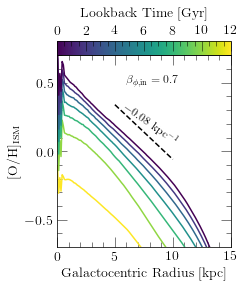

In [13]:
LOOKBACKS = [12, 10, 8, 6, 4, 2, 0]
COLORMAP = "viridis"
REFSLOPE = -0.08
REFOFFSET = 0.1
REFTEXT_X = 5.5
REFTEXT_Y = 0.05
REFTEXT_ROT = -35

fig = plt.figure(figsize = (3.5, 4))
ax = fig.add_subplot(111)
ax.set_xlabel(r"Galactocentric Radius [kpc]")
ax.set_ylabel(r"[O/H]$_\text{ISM}$")
ax.set_xlim([0, 15])
ax.set_ylim([-0.7, 0.7])
ax.set_yticks([-0.5, 0, 0.5])

### ANNOTATION IN THE UPPER RIGHT
# ax.text(6, 0.5, r"$v_{r,g} = -1$ km/s", fontsize = 12)
ax.text(6, 0.5, r"$\beta_{\phi,\text{in}} = 0.7$", fontsize = 12)
# ax.text(6, 0.5, r"River", fontsize = 12)

norm = plt.Normalize(vmin = min(LOOKBACKS), vmax = max(LOOKBACKS))
cmap = plt.cm.ScalarMappable(cmap = COLORMAP, norm = norm)
cbar_ax = fig.add_axes([0.9, 0.1, 0.05, 0.6])
cbar = plt.colorbar(cmap, cax = cbar_ax, orientation = "horizontal")
cbar.set_label("Lookback Time [Gyr]", labelpad = 8)
cbar.ax.xaxis.set_ticks_position("top")
cbar.ax.xaxis.set_label_position("top")
cbar.set_ticks([0, 2, 4, 6, 8, 10, 12])

def plot_snapshot(output, lookback, zone_width = 0.1, **kwargs):
    radii = [zone_width * (i + 0.5) for i in range(len(output.zones.keys()))]
    diff = [abs(_ - lookback) for _ in output.zones["zone0"].history["lookback"]]
    idx = diff.index(min(diff))
    oh = []
    for i in range(len(radii)):
        oh.append(output.zones["zone%d" % (i)].history["[o/h]"][idx])
    ax.plot(radii, oh, **kwargs)
    
for i in range(len(LOOKBACKS)):
    kwargs = {
        "c": cmap.to_rgba(LOOKBACKS[i])
    }
    plot_snapshot(output, LOOKBACKS[i], **kwargs)
    
xvals = np.linspace(5, 10, 100)
yvals = [REFSLOPE * (r - 8) + REFOFFSET for r in xvals]
ax.plot(xvals, yvals, c = named_colors()["black"], linestyle = "--")
ax.text(REFTEXT_X, REFTEXT_Y, r"$%.2f$ kpc$^{-1}$" % (REFSLOPE), fontsize = 12, rotation = REFTEXT_ROT)

plt.tight_layout()
plt.subplots_adjust(top = 0.82)
cbar_ax.set_position([
    ax.get_position().x0,
    ax.get_position().y1,
    ax.get_position().x1 - ax.get_position().x0,
    0.05
])
for ext in ["pdf", "jpeg"]:
    kwargs = {}
    if ext == "jpeg": kwargs["dpi"] = 200
#     plt.savefig("./evol/oh-ism-snapshots-%s.%s" % (output.name.split('/')[-1], ext), **kwargs)
#     plt.savefig("./evol/oh-ism-snapshots-river.%s" % (ext), **kwargs)
plt.show()

In [21]:
# outputs = [
#     "../outputs/constant/vgas-0",
#     "../outputs/constant/vgas-0p5",
#     "../outputs/constant/vgas-1",
#     "../outputs/constant/vgas-1p5",
# ]
# outputs = [
#     "../outputs/constant/vgas-0",
#     "../outputs/amd/betaphiin0p7",
#     "../outputs/amd/betaphiin0p5",
# ]
outputs = [
    "../outputs/constant/vgas-0",
    "../outputs/river/insideout"
]
outputs = [vice.output(name) for name in outputs]

[-2.052373571890421, 537.4635980069293, 11.276598930049389, 7.24279910134503, 6.265292601354362, 5.079338241495377, 6.602393953739808, 5.345986531191348, 4.78774262718722, 4.414023907432212, 4.311421468367182, 4.831351141639021, 4.492962080029564, 4.187419695099202, 4.603597196760047, 4.305910330324699, 3.72384795294717, 4.743567006363056, 4.032526218175665, 4.4184267293966055, 4.376182670918993, 4.034096870156874, 4.189494763203647, 4.270691524786342, 4.089566067509193, 4.14459316007654, 3.9462773351785976, 4.3728273833465225, 3.7955479778171886, 4.863196826136933, 4.121767837082798, 5.112650687289905, 4.187035174404528, 5.117114579748359, 4.259214320263502, 4.026028502047565, 4.835166596239034, 4.714247323617315, 4.645571982137625, 4.304489650802911, 4.288246723482187, 4.513025684181577, 4.684114691282324, 5.38171169341078, 4.260359447441066, 4.535229667761091, 4.609473507146453, 4.914848035563347, 4.821625768064674, 5.271253061867339, 4.771699491715262, 5.240201426728179, 4.89335678

/Users/astrobeard/Work/Research/milkyway/radial-flows/notebooks/../src/utils.py:35: RuntimeWarning: divide by zero encountered in double_scalars
  mu += (vgas[i + 1] - vgas[i]) / (vgas[i] * zone_width)
/Users/astrobeard/Work/Research/milkyway/radial-flows/notebooks/../src/utils.py:36: RuntimeWarning: invalid value encountered in double_scalars
  mu *= -tau_star * vgas[i]


[nan, -14.139342920323557, -24.639242002430763, -117.08428657585469, 232.19206598885006, 78.19399022850529, 28.380019829716026, 173.81878356274325, 17.882924685757406, 47.77065422622417, 19.60742860299697, 16.068109700686612, 38.08266636894603, 26.127658682200106, 19.2315324311358, 28.443456220054447, 25.35914540904664, 23.218244980902956, 16.34272368119895, -83.5750879968115, 1741.955051465166, 46.154941009818835, 223.43136314367354, -159.62975671155522, 104.95292113990124, 38.02835899453086, 234.57903285001134, -204.63845658672813, 43.638589939257706, 42.79305463498442, 93.78296071854905, 33.115058207562015, -18.16945385862276, -42.21172309705969, -122.37694551207692, 26.173242335019545, 172.4694527636346, 39.5645195591943, -110.73789654286071, 496.32922993419834, -181.32529204405026, 273.28023462574754, -68.45850980736459, 63.031304345056554, -136.17513083761602, 51.67398720743206, -78.30046608723056, -118.93497660318165, -179.76141250432855, -117.24924025515539, -29.107306351387837

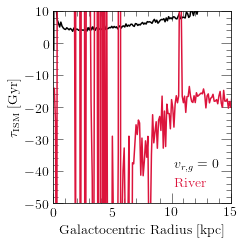

In [28]:
# COLORS = ["black", "crimson", "lime", "blue"]
# LABELS = [r"$0$ km/s", r"$-0.5$ km/s", r"$-1$ km/s", r"$-1.5$ km/s"]
# COLORS = ["black", "crimson", "blue"]
# LABELS = [
#     r"$\beta_{\phi,\text{in}} = 1$",
#     r"$\beta_{\phi,\text{in}} = 0.7$",
#     r"$\beta_{\phi,\text{in}} = 0.5$"
# ]
COLORS = ["black", "crimson"]
LABELS = [r"$v_{r,g} = 0$", "River"]
IMAGE_NAME_ENDING = "river"

fig = plt.figure(figsize = (3.5, 3.5))
ax = fig.add_subplot(111)
ax.set_xlabel(r"Galactocentric Radius [kpc]")
ax.set_ylabel(r"$\tau_\text{ISM}$ [Gyr]")
ax.set_xlim([0, 15])
# ax.set_ylim([0, 10])
# ax.set_ylim([0, 15])
# ax.set_yticks([0, 5, 10, 15])
ax.set_ylim([-50, 10])

def tau_ism_profile(output, gasflows = True, zone_width = 0.1):
    if gasflows:
        radii, mu_g, _ = mu(output, 0, zone_width = zone_width)
    else:
        radii = [zone_width * (i + 0.5) for i in range(int(20 / zone_width))]
        mu_g = len(radii) * [0.]
    tau_ism = []
    for i in range(len(radii) - 1):
        zone = output.zones["zone%d" % (i)]
        try:
            tau_star = zone.history["mgas"][-1] / zone.history["sfr"][-1] * 1.e-9
        except ZeroDivisionError:
            tau_star = float("inf")
        recycling = zone.history["R_eff"][-1]
        try:
            tau_ism.append(tau_star / (1 - mu_g[i] - recycling))
        except ZeroDivisionError:
            tau_ism.append(float("inf"))
#         if tau_ism[-1] < 0: tau_ism[-1] = float("nan")
    print(tau_ism)
    return [radii[:-1], tau_ism]

def plot_model(output, gasflows = True, zone_width = 0.1, **kwargs):
    radii, tau_ism = tau_ism_profile(output, gasflows = gasflows, zone_width = zone_width)
    ax.plot(radii, tau_ism, **kwargs)
    
for i in range(len(outputs)):
    kwargs = {
        "c": named_colors()[COLORS[i]],
        "label": LABELS[i]
    }
    plot_model(outputs[i],
        gasflows = os.path.exists("%s_gasvelocities.out" % (outputs[i].name)),
        **kwargs)
    
kwargs = {
#     "loc": mpl_loc("lower left"),
    "loc": mpl_loc("lower right"),
    "handlelength": 0,
#     "ncol": 2,
#     "columnspacing": 0.5
}
leg = ax.legend(**kwargs)
fancy_legend(leg, COLORS)

plt.tight_layout()
for ext in ["pdf", "jpeg"]:
    kwargs = {}
    if ext == "jpeg": kwargs["dpi"] = 200
    plt.savefig("./evol/tau-ism-%s.%s" % (IMAGE_NAME_ENDING, ext), **kwargs)
plt.show()